Evaluating Quality: 100%|██████████| 8683/8683 [21:41<00:00,  6.67it/s]  


✅ Average PSNR: 18.71 dB
✅ Average SSIM: 0.5985


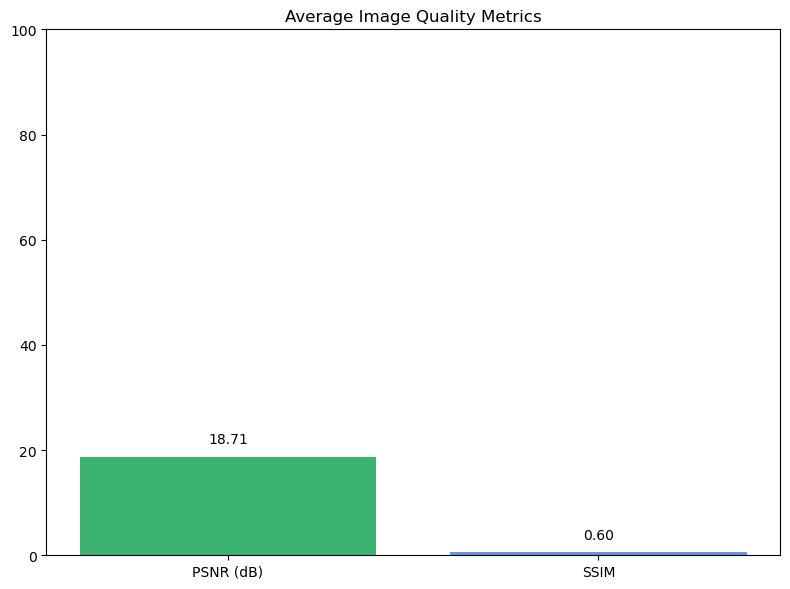

In [7]:
# =========================================================
# Digital Image Processing Project: Quality Evaluation
# =========================================================
# Evaluate artwork restoration quality using:
# - PSNR (Peak Signal-to-Noise Ratio)
# - SSIM (Structural Similarity Index)
# =========================================================

# 0. Libraries
# =========================================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim
from tqdm import tqdm

# 1. Helper Functions
# =========================================================

def calculate_psnr(img1, img2):
    """Calculate PSNR between two images."""
    return compare_psnr(img1, img2, data_range=255)

def calculate_ssim(img1, img2):
    """Calculate SSIM between two images."""
    ssim_value, _ = compare_ssim(img1, img2, channel_axis=-1, full=True)
    return ssim_value

# 2. Evaluation Function
# =========================================================

def evaluate_quality(restored_folder, degraded_folder):
    """Evaluate PSNR and SSIM scores."""
    restored_images = sorted(glob.glob(os.path.join(restored_folder, "*.jpg")))
    degraded_images = sorted(glob.glob(os.path.join(degraded_folder, "*.jpg")))

    psnr_scores = []
    ssim_scores = []

    for restored_path, degraded_path in tqdm(zip(restored_images, degraded_images),
                                              total=len(restored_images),
                                              desc="Evaluating Quality"):

        img_restored = cv2.imread(restored_path)
        img_restored = cv2.cvtColor(img_restored, cv2.COLOR_BGR2RGB)

        img_degraded = cv2.imread(degraded_path)
        img_degraded = cv2.cvtColor(img_degraded, cv2.COLOR_BGR2RGB)

        psnr_score = calculate_psnr(img_restored, img_degraded)
        ssim_score = calculate_ssim(img_restored, img_degraded)

        psnr_scores.append(psnr_score)
        ssim_scores.append(ssim_score)

    return psnr_scores, ssim_scores

# 3. Plot Results
# =========================================================

def plot_quality(psnr_scores, ssim_scores):
    """Plot average PSNR and SSIM."""
    avg_psnr = np.mean(psnr_scores)
    avg_ssim = np.mean(ssim_scores)

    print(f"✅ Average PSNR: {avg_psnr:.2f} dB")
    print(f"✅ Average SSIM: {avg_ssim:.4f}")

    metrics = ['PSNR (dB)', 'SSIM']
    values = [avg_psnr, avg_ssim]

    plt.figure(figsize=(8,6))
    bars = plt.bar(metrics, values, color=['mediumseagreen', 'cornflowerblue'])
    plt.title("Average Image Quality Metrics")
    plt.ylim(0, 100)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# 4. Main Execution
# =========================================================

restored_folder = r"C:\Users\fatom\Downloads\IP_Dataset\restored_full"
degraded_folder = r"C:\Users\fatom\Downloads\IP_Dataset\degraded_full"

psnr_scores, ssim_scores = evaluate_quality(restored_folder, degraded_folder)
plot_quality(psnr_scores, ssim_scores)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\fatom\anaconda3\envs\ip25\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\fatom\anaconda3\envs\ip25\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\fatom/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:22<00:00, 10.8MB/s] 
C:\Users\fatom\anaconda3\envs\ip25\lib\site-packages\lpips\lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current

Loading model from: C:\Users\fatom\anaconda3\envs\ip25\lib\site-packages\lpips\weights\v0.1\alex.pth


Evaluating Quality: 100%|██████████| 8683/8683 [30:53<00:00,  4.68it/s]  



✅ Average LPIPS Score (Lower is Better): 0.2267


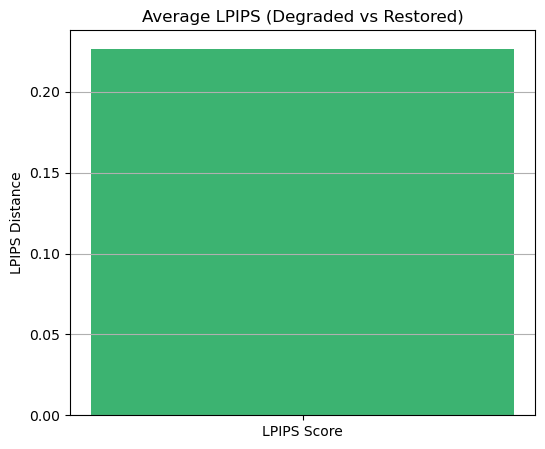

In [9]:
# =========================================================
# Digital Image Processing Project: Image Quality Evaluation (LPIPS)
# =========================================================
# We evaluate the quality of restored images using the LPIPS metric
# =========================================================

# 0. Install and Import Libraries
# =========================================================
import subprocess
import sys

# Install lpips if needed
try:
    import lpips
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "lpips"])
    import lpips

import os
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Paths Setup
# =========================================================
degraded_folder = r"C:\Users\fatom\Downloads\IP_Dataset\degraded_full"
restored_folder = r"C:\Users\fatom\Downloads\IP_Dataset\restored_full"

# 2. LPIPS Model Setup
# =========================================================
lpips_model = lpips.LPIPS(net='alex')  # Using AlexNet backbone
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lpips_model = lpips_model.to(device)

# 3. Image Loading Function
# =========================================================
def load_image_for_lpips(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0
    img = torch.from_numpy(img).permute(2,0,1).unsqueeze(0)
    return img.to(device)

# 4. LPIPS Evaluation
# =========================================================
scores = []

image_names = sorted(os.listdir(degraded_folder))

for name in tqdm(image_names, desc="Evaluating Quality"):
    degraded_img = load_image_for_lpips(os.path.join(degraded_folder, name))
    restored_img = load_image_for_lpips(os.path.join(restored_folder, name))
    
    distance = lpips_model(degraded_img, restored_img)
    scores.append(distance.item())

# 5. Results
# =========================================================
average_lpips = np.mean(scores)

print(f"\n✅ Average LPIPS Score (Lower is Better): {average_lpips:.4f}")

# 6. Visualization
# =========================================================
plt.figure(figsize=(6,5))
plt.bar(["LPIPS Score"], [average_lpips], color="mediumseagreen")
plt.title("Average LPIPS (Degraded vs Restored)")
plt.ylabel("LPIPS Distance")
plt.grid(axis='y')
plt.show()


Evaluating FSIM: 100%|██████████| 8683/8683 [02:37<00:00, 55.09it/s] 

✅ Average FSIM Score: 0.4583 (Higher is better)


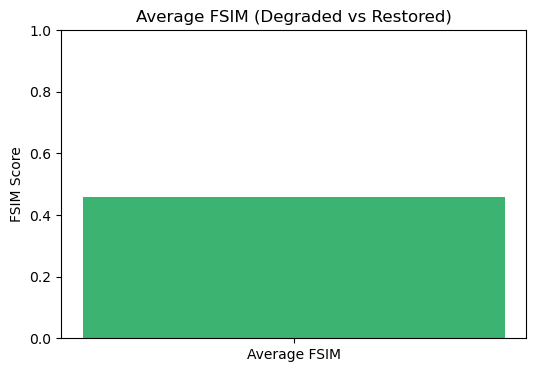

In [15]:
# =========================================================
# FSIM Evaluation: Degraded vs Restored Artworks
# =========================================================
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Lightweight FSIM function (simplified version)
def compute_fsim(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

    img1_gray = img1_gray.astype(np.float32) / 255.0
    img2_gray = img2_gray.astype(np.float32) / 255.0

    gradient_kernel = np.array([[1, 0, -1], 
                                [1, 0, -1], 
                                [1, 0, -1]], dtype=np.float32) / 3.0

    grad1 = cv2.filter2D(img1_gray, -1, gradient_kernel)
    grad2 = cv2.filter2D(img2_gray, -1, gradient_kernel)

    T = 0.85
    PC1 = np.maximum(np.abs(grad1), T)
    PC2 = np.maximum(np.abs(grad2), T)

    similarity_PC = (2 * PC1 * PC2 + 1e-8) / (PC1**2 + PC2**2 + 1e-8)
    similarity_grad = (2 * grad1 * grad2 + 1e-8) / (grad1**2 + grad2**2 + 1e-8)

    fsim_map = similarity_PC * similarity_grad
    fsim_score = np.mean(fsim_map)

    return fsim_score

# =========================================================
# 1. Paths
# =========================================================
degraded_folder = r"C:\Users\fatom\Downloads\IP_Dataset\degraded_full"
restored_folder = r"C:\Users\fatom\Downloads\IP_Dataset\restored_full"

degraded_files = sorted(os.listdir(degraded_folder))
restored_files = sorted(os.listdir(restored_folder))

assert len(degraded_files) == len(restored_files), "Mismatch between degraded and restored images!"

# =========================================================
# 2. FSIM Evaluation
# =========================================================
fsim_scores = []

for d_file, r_file in tqdm(zip(degraded_files, restored_files), total=len(degraded_files), desc="Evaluating FSIM"):
    d_path = os.path.join(degraded_folder, d_file)
    r_path = os.path.join(restored_folder, r_file)

    img_d = cv2.cvtColor(cv2.imread(d_path), cv2.COLOR_BGR2RGB)
    img_r = cv2.cvtColor(cv2.imread(r_path), cv2.COLOR_BGR2RGB)

    fsim = compute_fsim(img_d, img_r)
    fsim_scores.append(fsim)

# =========================================================
# 3. Results
# =========================================================
avg_fsim = np.mean(fsim_scores)
print(f"✅ Average FSIM Score: {avg_fsim:.4f} (Higher is better)")

# =========================================================
# 4. Visualization
# =========================================================
plt.figure(figsize=(6,4))
plt.bar(['Average FSIM'], [avg_fsim], color='mediumseagreen')
plt.ylim(0, 1)
plt.ylabel('FSIM Score')
plt.title('Average FSIM (Degraded vs Restored)')
plt.show()
